In [6]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('/content/sample_data/concrete_data.csv')

In [8]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
x = data.drop('Strength',axis=1)
y = data['Strength']

In [10]:
import sklearn
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [11]:
y_test.head()

,Strength
623,12.54
488,22.75
267,45.08
443,37.27
134,71.30


In [12]:
x_train.head()
y_train = tf.cast(y_train, tf.float32)
y_test = tf.cast(y_test, tf.float32)


In [23]:
tf.random.set_seed(22)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),

    tf.keras.layers.Dense(64, activation = 'leaky_relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),

    tf.keras.layers.Dense(128, activation = 'leaky_relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),

     tf.keras.layers.Dense(64, activation = 'leaky_relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),

    tf.keras.layers.Dense(1, activation = 'leaky_relu')
])

model.compile(loss = tf.keras.losses.MeanSquaredError(),
              optimizer = tf.keras.optimizers.Lion(learning_rate=0.0001))

In [ ]:
model.fit(x_train,y_train,epochs=100, verbose=1, validation_data=(x_test,y_test))

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 441.3470 - val_loss: 441.1419
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 425.3890 - val_loss: 436.8879
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 420.1342 - val_loss: 432.0997
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 414.6642 - val_loss: 426.5256
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 408.9511 - val_loss: 421.0718
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 403.5427 - val_loss: 415.5109
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 398.1404 - val_loss: 409.9945
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 392.7380 - val_loss: 404.3329
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 387.2726 - val_loss: 398.6325
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 381.7715 - val_loss: 392.8104
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 376.0565 - val_loss: 386.4214
Epoch 12/100
26/26 

In [ ]:
loss = model.evaluate(x_test,y_test)
loss

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 303.2779 


288.7760314941406

In [ ]:

training_results = model.fit(x_train, y_train, epochs =100, verbose = 0, validation_data=(x_test, y_test))

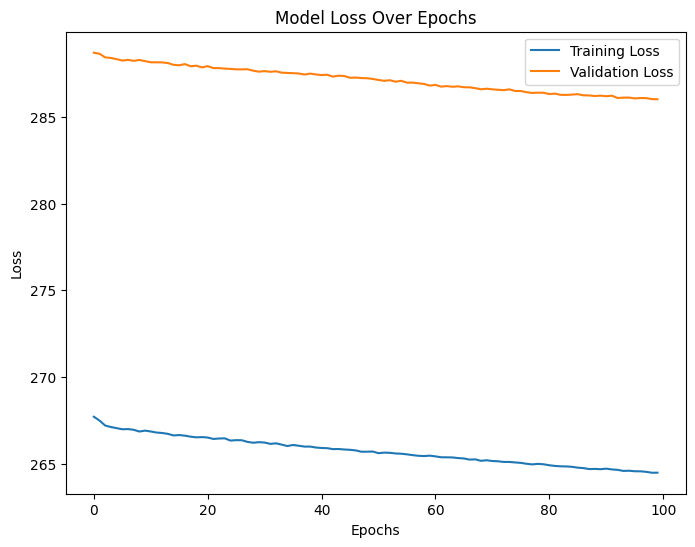

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(training_results.history['loss'], label='Training Loss')
plt.plot(training_results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()